# Minería de textos: Manejo de fechas
## RafaCastle

## Instrucciones:

El participante debe: cargar y leer archivos línea por línea, e identificar algunos patrones para poder extraer correctamente la información solicitada, implementar dichos patrones haciendo uso de expresiones regulares, y finalmente ordenar las fechas extraídas. En este sentido se les sugiere estudiar la documentación respecto al módulo datetime proporcionado en Python para el manejo de fechas.


### Situación a resolver:


Se tiene un archivo (dates.txt) donde cada línea de este corresponde a una nota médica y cada nota tiene una fecha que debe extraerse, pero cada fecha está codificada en uno de muchos formatos. Por ejemplo, se muestra a continuación una lista de algunas de las variantes que se puede encontrar en este conjunto de datos:

    04/20/2009; 04/20/09; 4/20/09; 4/3/09
    Mar-20-2009; Mar 20, 2009; March 20, 2009; Mar. 20, 2009; Mar 20 2009;
    20 Mar 2009; 20 March 2009; 20 Mar. 2009; 20 March, 2009
    Mar 20th, 2009; Mar 21st, 2009; Mar 22nd, 2009
    Feb 2009; Sep 2009; Oct 2010
    6/2008; 12/2009
    2009; 2010
   
   La actividad consiste en:

a)     Identificar correctamente todas las diferentes variantes de fecha codificadas en este conjunto de datos, normalizar y ordenar adecuadamente las fechas.

b)     Una vez que haya extraído estos patrones de fecha del texto, el siguiente paso es clasificarlos en orden cronológico ascendente de acuerdo con las siguientes reglas:

Todas las fechas están en formato xx/xx/xx son mm/dd/aa.
Todas las fechas en las que el año está codificado en solo dos dígitos corresponden a años posteriores a la década de 1900 (p. Ej., 1/5/89 es el 5 de enero de 1989).
Si falta el día (p. Ej., 9/2009), suponga que es el primer día del mes (p. Ej., septiembre, 1 de 2009).
Si falta el mes (por ejemplo, 2010), suponga que es el primero de enero de ese año (p. Ej., enero, 1 de 2010).
Tenga cuidado con los posibles errores tipográficos, ya que este es un conjunto de datos derivados de la vida real.
Esta función debería devolver una lista de longitud 500.

## Solución

A continuación se importará el archivo y se irán obteniendo las fechas de éste variando los formatos:

In [1]:
import re
import calendar
from datetime import date, time, datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dates=open("dates.txt").read().strip()
dates_copy=dates # conservar el original

En las siguiente celda se eliminan 2 errores que le parecen fechas al código desarrollado a continuación pero tienen un significado distinto. Además se obtiene la lista de meses y abreviaciones de los mismos para detectarlos en el texto

In [3]:
# errores
dates=re.sub("AST/ALT-16/22","-----",dates)
dates=re.sub("4.9/36/308","-----",dates)

# listas de meses
meses=list(calendar.month_name[1:])
meses_a=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"] # abreviados

Se obtienen las fechas para los distintos formatos

In [4]:
# formato mm/dd/yyyy ó mm/dd/yy
formato1=re.findall("\w{1,2}/\w{1,2}/\d{2,4}",dates)
dates=re.sub("\w{1,2}/\w{1,2}/\d{2,4}","-----",dates) #sustituir para no repetir

# formato dd mmm yyyy
formato2=re.findall("\d{2} [a-zA-Z]{3} \d{4}",dates)
dates=re.sub("\d{2} [a-zA-Z]{3} \d{4}","-----",dates)

# formato dd month(completo) yyyy
formato3=[]
for i in range(12):
    formato3+=re.findall("\d{2} " + meses[i] + " \d{4}", dates)
    dates=re.sub("\d{2} " + meses[i] + " \d{4}","-----",dates)
    formato3+=re.findall("\d{2} " + meses_a[i] + " \d{4}", dates)
    dates=re.sub("\d{2} " + meses_a[i] + " \d{4}","-----",dates)
    
# formato mm-dd-yy
formato4=re.findall("\d{1,2}-\d{1,2}-\d{2}",dates)
dates=re.sub("\d{1,2}-\d{1,2}-\d{2}","-----",dates)

# formato month dd, yyyy
formato5=[]
for i in range(12):
    formato5+=re.findall(meses[i] + ".? \d{1,2},? \d{4}", dates)
    dates=re.sub(meses[i] + ".? \d{1,2},? \d{4}","-----",dates)
    formato5+=re.findall(meses_a[i] + ".? \d{1,2},? \d{4}", dates)
    dates=re.sub(meses_a[i] + ".? \d{1,2},? \d{4}","-----",dates)
    
# formato month yyyy
formato6=[]
for i in range(12):
    formato6+=re.findall(meses[i] + ",? \d{4}", dates)
    dates=re.sub(meses[i] + ",? \d{4}","-----",dates)
    formato6+=re.findall(meses_a[i] + ",? \d{4}", dates)
    dates=re.sub(meses_a[i] + ",? \d{4}","-----",dates)
    
# formato mm/yyyy ó mm/yy
formato7=re.findall("\w{1,2}/\d{2,4}",dates)
dates=re.sub("\w{1,2}/\d{2,4}","-----",dates) 

# formato 19yy
formato8=re.findall("19\d{2}",dates)
dates=re.sub("19\d{2}","-----",dates) 

# formato 20yy
formato9=re.findall("20\d{2}",dates)
dates=re.sub("20\d{2}","-----",dates) 

Verificando si se tienen todas las fechas:

In [5]:
formatos=formato1+formato2+formato3+formato4+formato5+formato6+formato7+formato8+formato9
len(formatos)

500

Se detectó el siguiente error en el texto. Por los métodos utilizados el código anterior va a detectar solo el año (1993), afortunadamente esto no resulta un problema ya que, a continuación, vamos a asignar una fecha exacta a los strings obtenidos y para los strings que solo tengan un año se asignará como día y mes el primero de enero, por lo que no hace falta editar nada en las listas donde se guardaron las fechas. 

In [6]:
errores=["Janaury 1993"]

### Asignando fechas

In [7]:
fechas=[]

#formato1
for i in formato1:
    mes, dia, año = i.split("/")
    if len(año)==2:
        año=int(año)
        if año>21: # años mayores a 21 se tomará la fecha en el siglo XX, para posterioes en el XXI
            año=año+1900
        else:
            año=año+2000
    mes, dia, año = int(mes), int(dia), int(año)
    fechas.append(date(year=año, month=mes, day=dia))
    
#formato2
for i in formato2:
    dia, mes, año = i.split(" ")
    mes=meses_a.index(mes)+1
    mes, dia, año = int(mes), int(dia), int(año)
    fechas.append(date(year=año, month=mes, day=dia))
    
#formato3
for i in formato3:
    dia, mes, año = i.split(" ")
    mes=meses.index(mes)+1
    mes, dia, año = int(mes), int(dia), int(año)
    fechas.append(date(year=año, month=mes, day=dia))
    
#formato4
for i in formato4:
    mes, dia, año = i.split("-")
    mes, dia, año = int(mes), int(dia), int(año)+1900
    fechas.append(date(year=año, month=mes, day=dia))
    
#formato5
for i in formato5:
    i=re.sub("[,.]","",i)
    mes, dia, año = i.split(" ")
    if mes in meses:
        mes=meses.index(mes)+1
    elif mes in meses_a:
        mes=meses_a.index(mes)+1
    dia, año = int(dia), int(año)
    fechas.append(date(year=año, month=mes, day=dia))
    
#formato6
for i in formato6:
    i=re.sub("[,.]","",i)
    mes, año = i.split(" ")
    if mes in meses:
        mes=meses.index(mes)+1
    elif mes in meses_a:
        mes=meses_a.index(mes)+1
    dia, año = int(1), int(año)
    fechas.append(date(year=año, month=mes, day=dia))
    
#formato7
for i in formato7:
    i=re.sub("[n]","",i)
    mes, año = i.split("/")
    if len(año)==2:
        año=int(año)
        if año>21: # años mayores a 21 se tomará la fecha en el siglo XX, para posterioes en el XXI
            año=año+1900
        else:
            año=año+2000
    mes, dia, año = int(mes), int(1), int(año)
    fechas.append(date(year=año, month=mes, day=dia))
    
#formato8 y formato9
for i in formato8+formato9:
    mes, dia, año = int(1), int(1), int(i)
    fechas.append(date(year=año, month=mes, day=dia))


## Fechas en orden

En la siguiente celda se graficará una histograma sobre el registro de fechas por año, desde la primera fecha registrada en 1971 hasta la última, registrada en 2016. En la próxima celda se mostrará todo el registro de fechas.

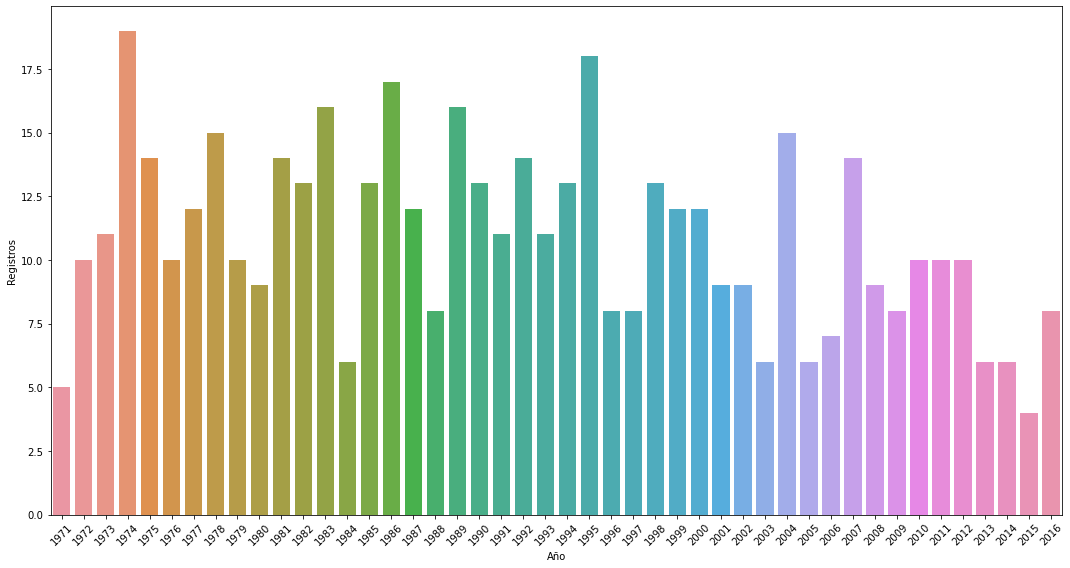

In [8]:
tiempo=[]
for i in fechas:
    tiempo.append([pd.Timestamp(i),pd.Timestamp(i)])

# agrupando por año
df1 = pd.DataFrame(tiempo,  columns=["Registros","Index"]);
df1.set_index("Index",inplace=True);
años=df1.groupby(pd.Grouper(freq='1Y')).count()
años=años.reset_index().rename(columns={"Index":"Año"})
años["Año"]=np.arange(1971, 2017)

#gráfica
plt.figure(figsize=(15, 8))
sns.barplot(x="Año",y="Registros",data=años);
plt.xticks(rotation=45)
plt.tight_layout()

Las fechas en orden son:

In [9]:
fechas.sort()
for fecha in fechas:
    print(fecha)

1971-04-10
1971-05-18
1971-07-08
1971-07-11
1971-09-12
1972-01-01
1972-01-13
1972-01-26
1972-05-06
1972-05-13
1972-06-10
1972-06-15
1972-07-20
1972-10-04
1972-11-30
1973-01-01
1973-02-01
1973-02-01
1973-02-14
1973-03-01
1973-03-01
1973-04-01
1973-06-01
1973-07-01
1973-10-01
1973-12-01
1974-01-01
1974-02-01
1974-02-24
1974-03-01
1974-03-05
1974-03-06
1974-04-01
1974-04-11
1974-04-12
1974-05-04
1974-05-26
1974-06-01
1974-06-13
1974-07-07
1974-08-01
1974-09-01
1974-09-10
1974-10-10
1974-10-14
1975-01-01
1975-02-28
1975-03-01
1975-04-09
1975-07-01
1975-07-29
1975-08-01
1975-08-18
1975-09-01
1975-09-01
1975-09-27
1975-11-22
1975-12-01
1975-12-14
1976-01-01
1976-02-01
1976-02-11
1976-03-01
1976-03-10
1976-04-01
1976-06-01
1976-09-02
1976-09-20
1976-10-13
1977-01-01
1977-01-01
1977-02-01
1977-02-01
1977-04-01
1977-05-01
1977-05-04
1977-05-21
1977-06-20
1977-07-01
1977-07-11
1977-10-21
1978-01-01
1978-01-01
1978-01-01
1978-01-01
1978-02-01
1978-02-02
1978-02-03
1978-03-01
1978-05-18
1978-07-26